# Lotto

data source:https://www.molottery.com/numbers/winning_nums.jsp#Lotto

# import and organize data into dataframe

In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
import random
    
df = pd.read_excel (r'lotto.xlsx', names= ['Draw Date',
                    'NumbersAsDrawn','NumbersInOrder','Jackpot','Jackpot_Winner','5of6',
                    '4of6','3of6']) 
print (df)

      Draw Date                    NumbersAsDrawn  \
0     Draw Date                  Numbers As Drawn   
1      3-Aug-22    25 -- 9 -- 26 -- 6 -- 29 -- 18   
2     30-Jul-22   40 -- 38 -- 7 -- 16 -- 26 -- 11   
3     27-Jul-22     20 -- 6 -- 9 -- 27 -- 5 -- 22   
4     23-Jul-22    1 -- 43 -- 13 -- 27 -- 6 -- 35   
...         ...                               ...   
2562  17-Jan-98  11 -- 12 -- 20 -- 30 -- 32 -- 44   
2563  14-Jan-98  14 -- 19 -- 23 -- 34 -- 36 -- 41   
2564  10-Jan-98  12 -- 22 -- 23 -- 26 -- 27 -- 43   
2565   7-Jan-98   7 -- 18 -- 28 -- 35 -- 38 -- 42   
2566   3-Jan-98   3 -- 15 -- 20 -- 21 -- 36 -- 40   

                        NumbersInOrder       Jackpot Jackpot_Winner    5of6  \
0                     Numbers In Order       Jackpot         6 of 6  5 of 6   
1       6 -- 9 -- 18 -- 25 -- 26 -- 29  $7.3 Million              0      19   
2      7 -- 11 -- 16 -- 26 -- 38 -- 40  $7.2 Million              0      27   
3        5 -- 6 -- 9 -- 20 -- 22 -- 27  $7.1 Mi

In [2]:
new_df = df.drop(columns=['NumbersAsDrawn','Jackpot','5of6','4of6','3of6'], axis=1)

In [3]:
new_df[['Ball1','Ball2','Ball3','Ball4','Ball5','Ball6']]= new_df['NumbersInOrder'].str.split('--', expand=True)
new_df.drop(0, inplace=True)

In [4]:
new_df

,Draw Date,NumbersInOrder,Jackpot_Winner,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6
1,3-Aug-22,6 -- 9 -- 18 -- 25 -- 26 -- 29,0,6,9,18,25,26,29
2,30-Jul-22,7 -- 11 -- 16 -- 26 -- 38 -- 40,0,7,11,16,26,38,40
3,27-Jul-22,5 -- 6 -- 9 -- 20 -- 22 -- 27,0,5,6,9,20,22,27
4,23-Jul-22,1 -- 6 -- 13 -- 27 -- 35 -- 43,0,1,6,13,27,35,43
5,20-Jul-22,14 -- 21 -- 22 -- 37 -- 42 -- 44,0,14,21,22,37,42,44
...,...,...,...,...,...,...,...,...,...
2562,17-Jan-98,11 -- 12 -- 20 -- 30 -- 32 -- 44,0,11,12,20,30,32,44
2563,14-Jan-98,14 -- 19 -- 23 -- 34 -- 36 -- 41,0,14,19,23,34,36,41
2564,10-Jan-98,12 -- 22 -- 23 -- 26 -- 27 -- 43,0,12,22,23,26,27,43
2565,7-Jan-98,7 -- 18 -- 28 -- 35 -- 38 -- 42,0,7,18,28,35,38,42


In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 1 to 2566
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Draw Date       2566 non-null   object
 1   NumbersInOrder  2566 non-null   object
 2   Jackpot_Winner  2566 non-null   object
 3   Ball1           2566 non-null   object
 4   Ball2           2566 non-null   object
 5   Ball3           2566 non-null   object
 6   Ball4           2566 non-null   object
 7   Ball5           2566 non-null   object
 8   Ball6           2566 non-null   object
dtypes: object(9)
memory usage: 180.6+ KB


In [6]:
new_df['Draw Date'] =  pd.to_datetime(new_df['Draw Date'])
new_df.Ball1 = new_df.Ball1.astype('int')
new_df.Ball2 = new_df.Ball2.astype('int')
new_df.Ball3 = new_df.Ball3.astype('int')
new_df.Ball4 = new_df.Ball4.astype('int')
new_df.Ball5 = new_df.Ball5.astype('int')
new_df.Ball6 = new_df.Ball6.astype('int')

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 1 to 2566
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Draw Date       2566 non-null   datetime64[ns]
 1   NumbersInOrder  2566 non-null   object        
 2   Jackpot_Winner  2566 non-null   object        
 3   Ball1           2566 non-null   int64         
 4   Ball2           2566 non-null   int64         
 5   Ball3           2566 non-null   int64         
 6   Ball4           2566 non-null   int64         
 7   Ball5           2566 non-null   int64         
 8   Ball6           2566 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 180.6+ KB


## Analyze and Visualize Data 

In [8]:
#set figure parameters
plt.rcParams['figure.figsize'] = [12.0, 8.0]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'

In [9]:
#statistical overview
new_df.describe()

,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6
count,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000
mean,6.547155,12.951286,19.397506,25.867498,32.201091,38.782151
std,5.200457,6.569078,7.157938,7.228462,6.636253,4.954657
min,1.000000,2.000000,3.000000,4.000000,7.000000,14.000000
25%,2.000000,8.000000,14.000000,21.000000,28.000000,36.000000
50%,5.000000,12.000000,19.000000,26.000000,33.000000,40.000000
75%,9.000000,17.000000,24.000000,31.000000,37.000000,43.000000
max,29.000000,36.000000,41.000000,42.000000,43.000000,44.000000


Text(0.5, 1.0, 'Ball 1 Distribution')

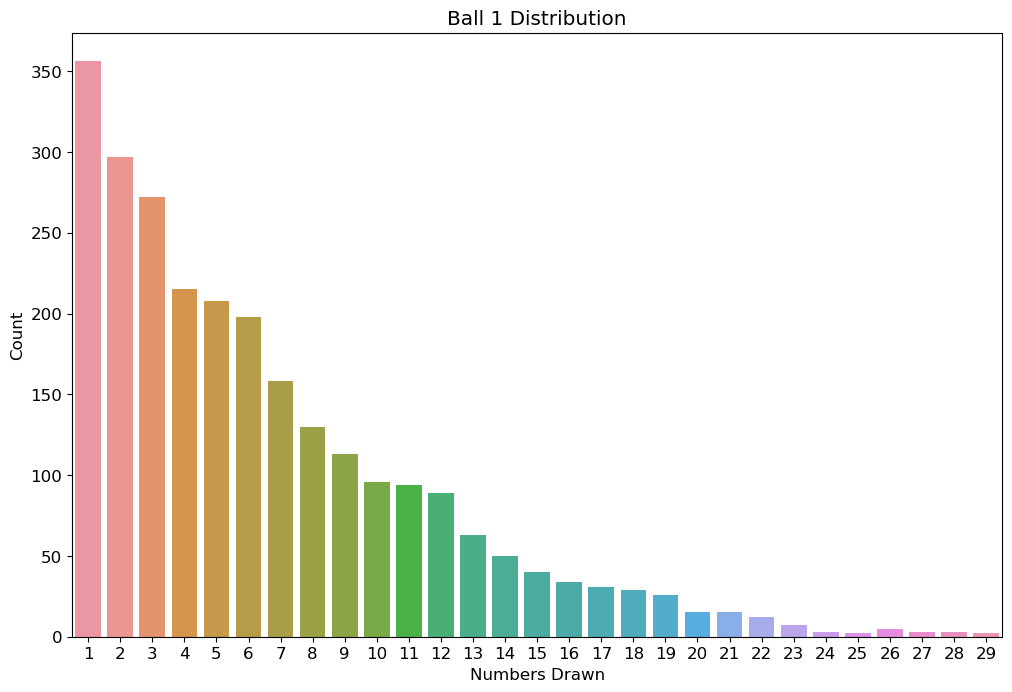

In [10]:
ax = sns.countplot(x="Ball1", data=new_df)
plt.xlabel('Numbers Drawn')
plt.ylabel('Count')
plt.title('Ball 1 Distribution')

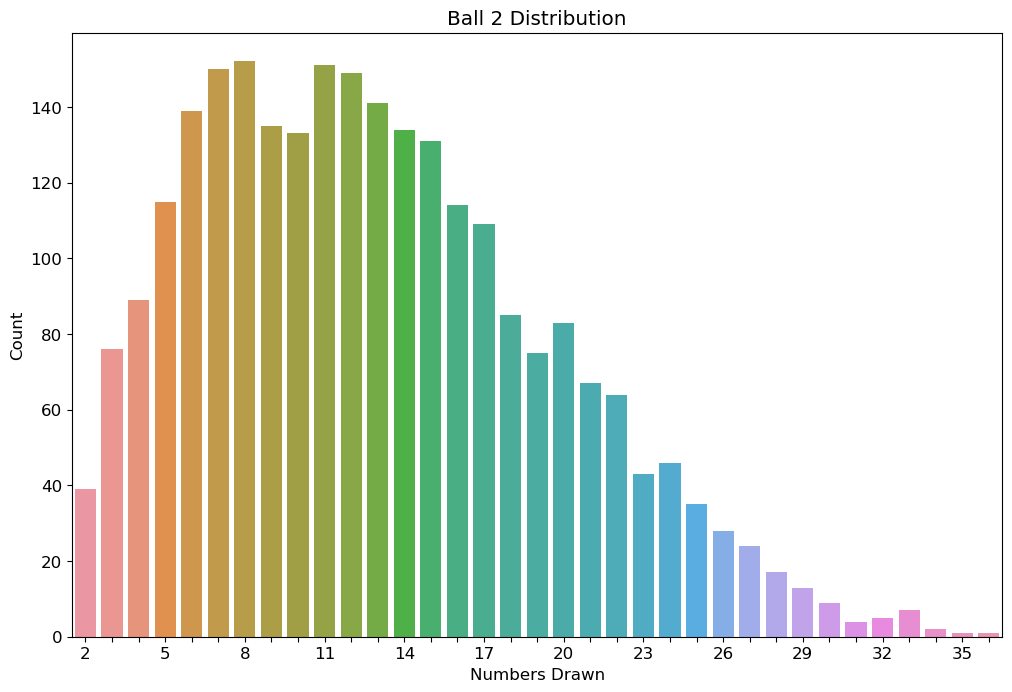

In [11]:
ax = sns.countplot(x="Ball2", data=new_df)
plt.xlabel('Numbers Drawn')
plt.ylabel('Count')
plt.title('Ball 2 Distribution')
#specify positions of ticks on x-axis and y-axis
for ax, label in enumerate(ax.get_xticklabels()):
    if ax % 3 == 0:  # every 3rd label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


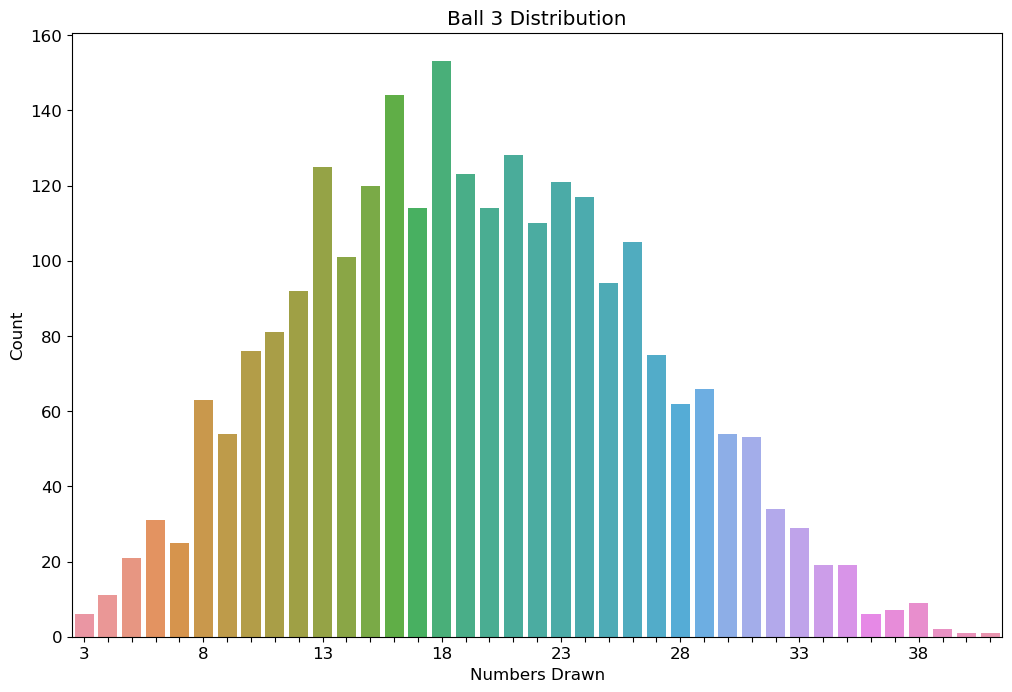

In [12]:
ax = sns.countplot(x="Ball3", data=new_df)
plt.xlabel('Numbers Drawn')
plt.ylabel('Count')
plt.title('Ball 3 Distribution')
for ax, label in enumerate(ax.get_xticklabels()):
    if ax % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

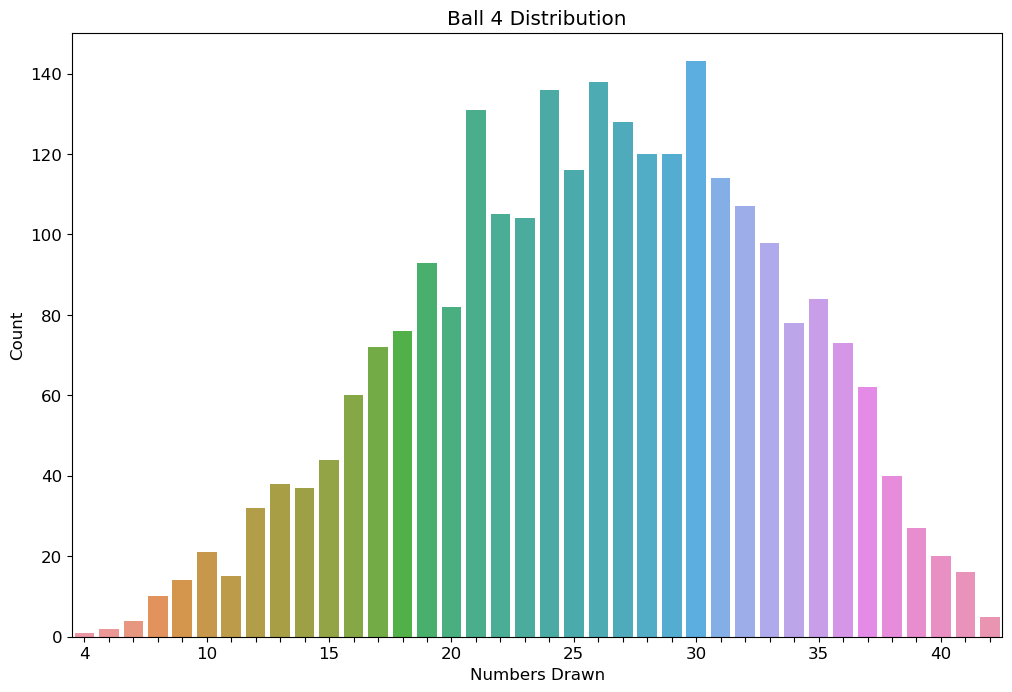

In [13]:
ax = sns.countplot(x="Ball4", data=new_df)
plt.xlabel('Numbers Drawn')
plt.ylabel('Count')
plt.title('Ball 4 Distribution')
for ax, label in enumerate(ax.get_xticklabels()):
    if ax % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


Text(0.5, 1.0, 'Ball 5 Distribution')

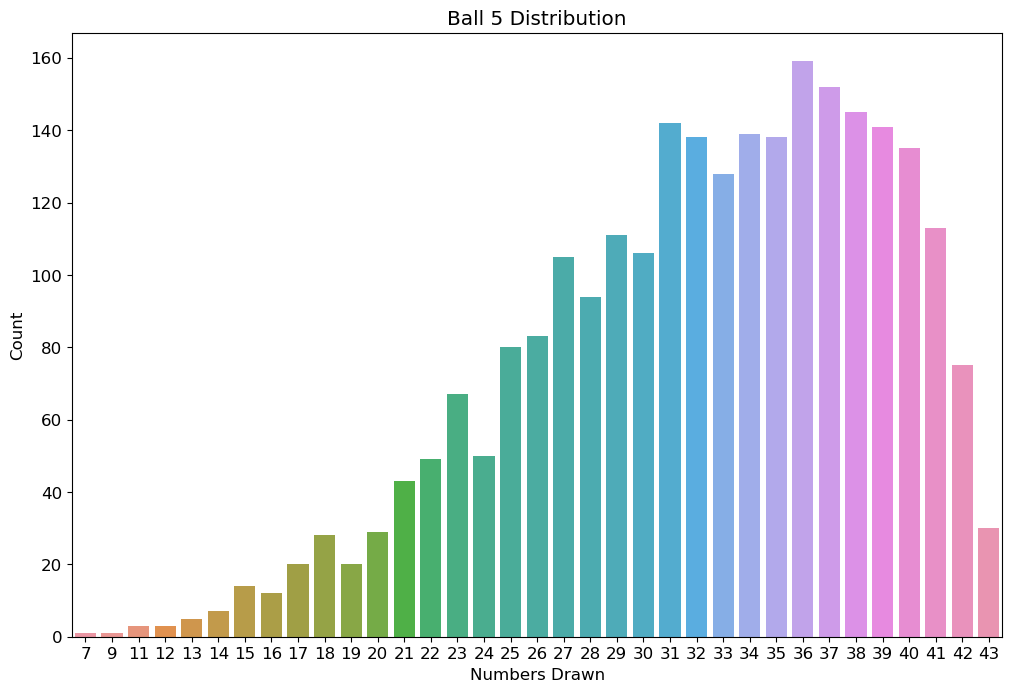

In [14]:
ax = sns.countplot(x="Ball5", data=new_df)
plt.xlabel('Numbers Drawn')
plt.ylabel('Count')
plt.title('Ball 5 Distribution')


Text(0.5, 1.0, 'Ball6 Distribution')

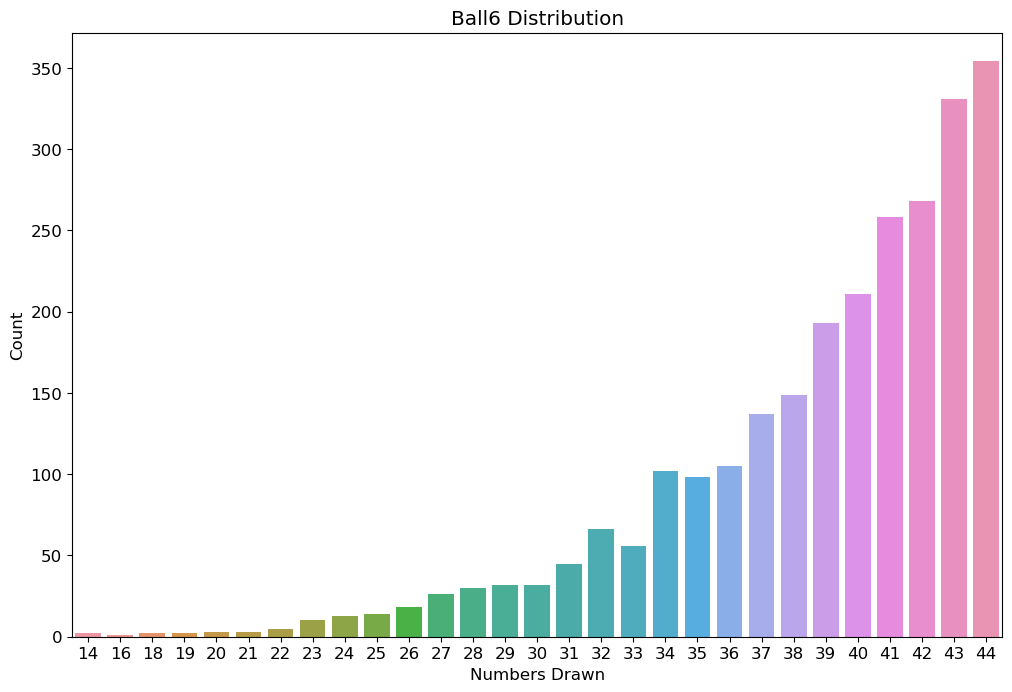

In [15]:
ax = sns.countplot(x="Ball6", data=new_df)
plt.xlabel('Numbers Drawn')
plt.ylabel('Count')
plt.title('Ball6 Distribution')

# Aggregate Ball1-Ball5 into a Total column

In [16]:
col_list= list(new_df.columns)
col_list.remove('Draw Date')
col_list.remove('NumbersInOrder')
new_df['Total'] = new_df[col_list].sum(axis=1)
new_df

,Draw Date,NumbersInOrder,Jackpot_Winner,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6,Total
1,2022-08-03,6 -- 9 -- 18 -- 25 -- 26 -- 29,0,6,9,18,25,26,29,113.0
2,2022-07-30,7 -- 11 -- 16 -- 26 -- 38 -- 40,0,7,11,16,26,38,40,138.0
3,2022-07-27,5 -- 6 -- 9 -- 20 -- 22 -- 27,0,5,6,9,20,22,27,89.0
4,2022-07-23,1 -- 6 -- 13 -- 27 -- 35 -- 43,0,1,6,13,27,35,43,125.0
5,2022-07-20,14 -- 21 -- 22 -- 37 -- 42 -- 44,0,14,21,22,37,42,44,180.0
...,...,...,...,...,...,...,...,...,...,...
2562,1998-01-17,11 -- 12 -- 20 -- 30 -- 32 -- 44,0,11,12,20,30,32,44,149.0
2563,1998-01-14,14 -- 19 -- 23 -- 34 -- 36 -- 41,0,14,19,23,34,36,41,167.0
2564,1998-01-10,12 -- 22 -- 23 -- 26 -- 27 -- 43,0,12,22,23,26,27,43,153.0
2565,1998-01-07,7 -- 18 -- 28 -- 35 -- 38 -- 42,0,7,18,28,35,38,42,168.0


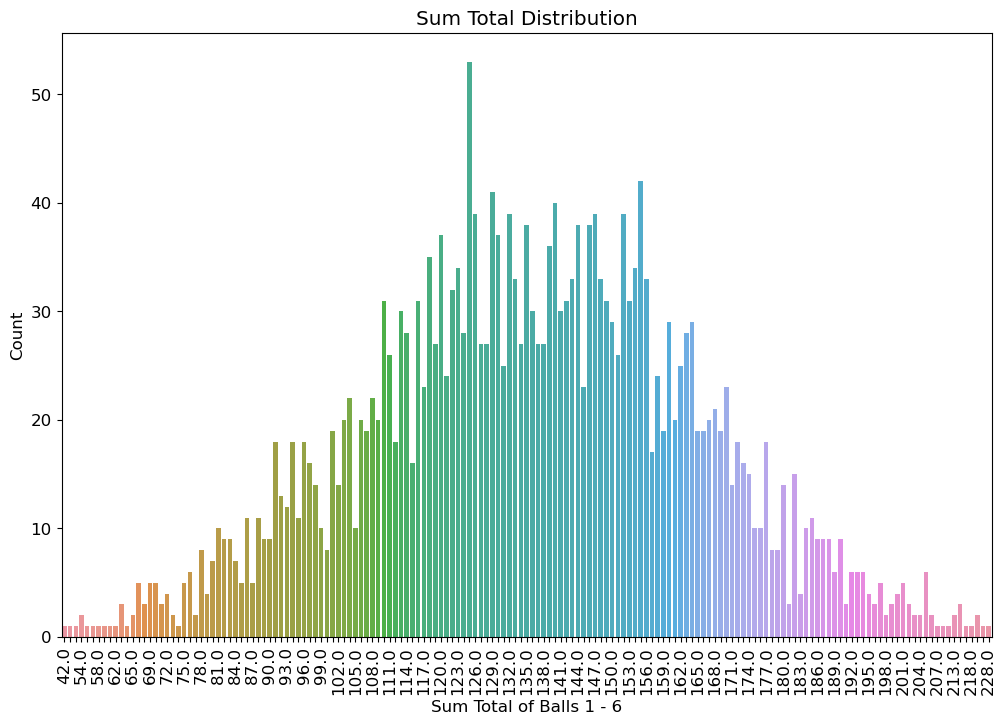

In [17]:
ax = sns.countplot(x="Total", data=new_df)
plt.xlabel('Sum Total of Balls 1 - 6')
plt.ylabel('Count')
plt.title('Sum Total Distribution')
plt.xticks(rotation=90)
for ax, label in enumerate(ax.get_xticklabels()):
    if ax % 3 == 0:  # every @nd label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [18]:
new_df.describe()

,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6,Total
count,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000
mean,6.547155,12.951286,19.397506,25.867498,32.201091,38.782151,135.813718
std,5.200457,6.569078,7.157938,7.228462,6.636253,4.954657,29.248288
min,1.000000,2.000000,3.000000,4.000000,7.000000,14.000000,42.000000
25%,2.000000,8.000000,14.000000,21.000000,28.000000,36.000000,116.000000
50%,5.000000,12.000000,19.000000,26.000000,33.000000,40.000000,136.000000
75%,9.000000,17.000000,24.000000,31.000000,37.000000,43.000000,155.000000
max,29.000000,36.000000,41.000000,42.000000,43.000000,44.000000,228.000000


In [19]:
#for total: 68%, 1 std, of all totals are equal to approx 105 - 165
#for total: 95%, 2 std, of all totals are equal to approx  75 - 195

In [20]:
#cases around the mean
new_df.query('Total>130 & Total<140').head(15)

,Draw Date,NumbersInOrder,Jackpot_Winner,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6,Total
2,2022-07-30,7 -- 11 -- 16 -- 26 -- 38 -- 40,0,7,11,16,26,38,40,138.0
7,2022-07-13,3 -- 5 -- 19 -- 28 -- 40 -- 42,0,3,5,19,28,40,42,137.0
18,2022-06-04,2 -- 6 -- 16 -- 29 -- 42 -- 43,0,2,6,16,29,42,43,138.0
20,2022-05-28,7 -- 14 -- 22 -- 24 -- 32 -- 34,0,7,14,22,24,32,34,133.0
25,2022-05-11,8 -- 14 -- 22 -- 28 -- 30 -- 32,0,8,14,22,28,30,32,134.0
28,2022-04-30,2 -- 13 -- 21 -- 25 -- 34 -- 38,0,2,13,21,25,34,38,133.0
37,2022-03-30,3 -- 9 -- 24 -- 26 -- 35 -- 39,0,3,9,24,26,35,39,136.0
43,2022-03-09,8 -- 9 -- 10 -- 31 -- 32 -- 43,0,8,9,10,31,32,43,133.0
47,2022-02-23,1 -- 16 -- 18 -- 22 -- 38 -- 42,0,1,16,18,22,38,42,137.0
56,2022-01-22,4 -- 17 -- 21 -- 22 -- 29 -- 40,0,4,17,21,22,29,40,133.0


# examine spacing between numbers

In [21]:
#return to a little statistial analysis
#look at difference between numbers
diff_df = pd.DataFrame()

In [22]:
diff_df['Draw Date'] = new_df['Draw Date']
diff_df['b2-b1'] = new_df['Ball2'] - new_df['Ball1']
diff_df['b3-b2'] = new_df['Ball3'] - new_df['Ball2']
diff_df['b4-b3'] = new_df['Ball4'] - new_df['Ball3']
diff_df['b5-b4'] = new_df['Ball5'] - new_df['Ball4']
diff_df['b6-b5'] = new_df['Ball6'] - new_df['Ball5']
diff_df['b6-b1'] = new_df['Ball6'] - new_df['Ball1']
diff_df

,Draw Date,b2-b1,b3-b2,b4-b3,b5-b4,b6-b5,b6-b1
1,2022-08-03,3,9,7,1,3,23
2,2022-07-30,4,5,10,12,2,33
3,2022-07-27,1,3,11,2,5,22
4,2022-07-23,5,7,14,8,8,42
5,2022-07-20,7,1,15,5,2,30
...,...,...,...,...,...,...,...
2562,1998-01-17,1,8,10,2,12,33
2563,1998-01-14,5,4,11,2,5,27
2564,1998-01-10,10,1,3,1,16,31
2565,1998-01-07,11,10,7,3,4,35


In [23]:
diff_df.describe()

,b2-b1,b3-b2,b4-b3,b5-b4,b6-b5,b6-b1
count,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000
mean,6.404131,6.446220,6.469992,6.333593,6.581060,32.234996
std,4.996838,5.074343,5.062309,5.077660,5.206483,6.448576
min,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000
25%,2.000000,2.000000,3.000000,2.000000,3.000000,28.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,33.000000
75%,9.000000,9.000000,9.000000,9.000000,9.000000,37.000000
max,31.000000,33.000000,33.000000,32.000000,31.000000,43.000000


Text(0.5, 1.0, 'Ball2 - Ball1')

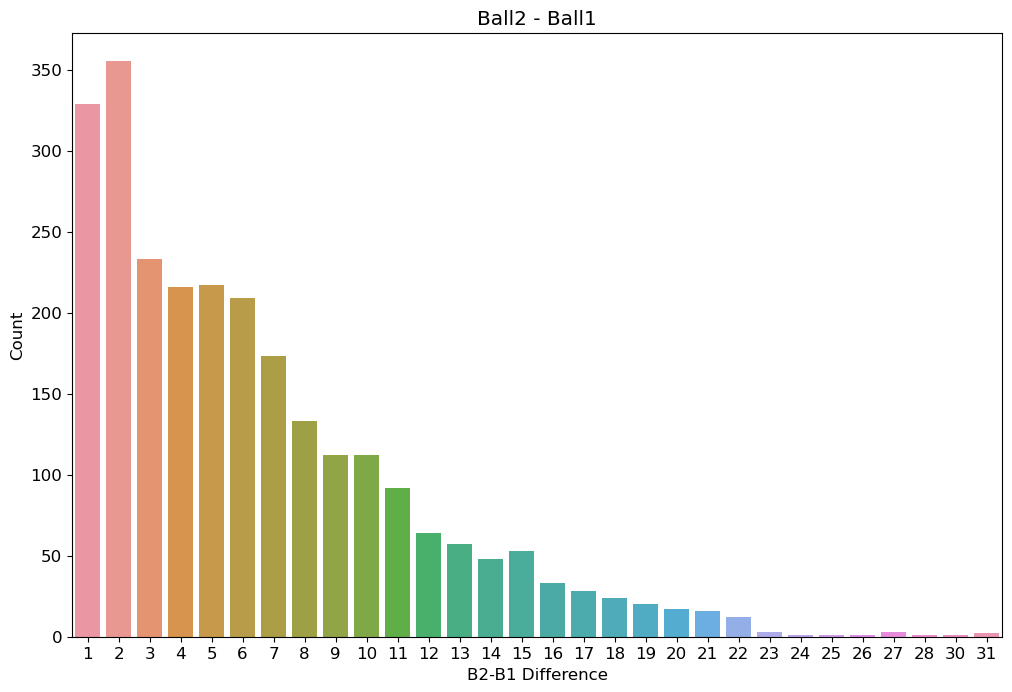

In [24]:
ax = sns.countplot(x="b2-b1", data=diff_df)
plt.xlabel('B2-B1 Difference')
plt.ylabel('Count')
plt.title('Ball2 - Ball1')

Text(0.5, 1.0, 'Ball3 - Ball2')

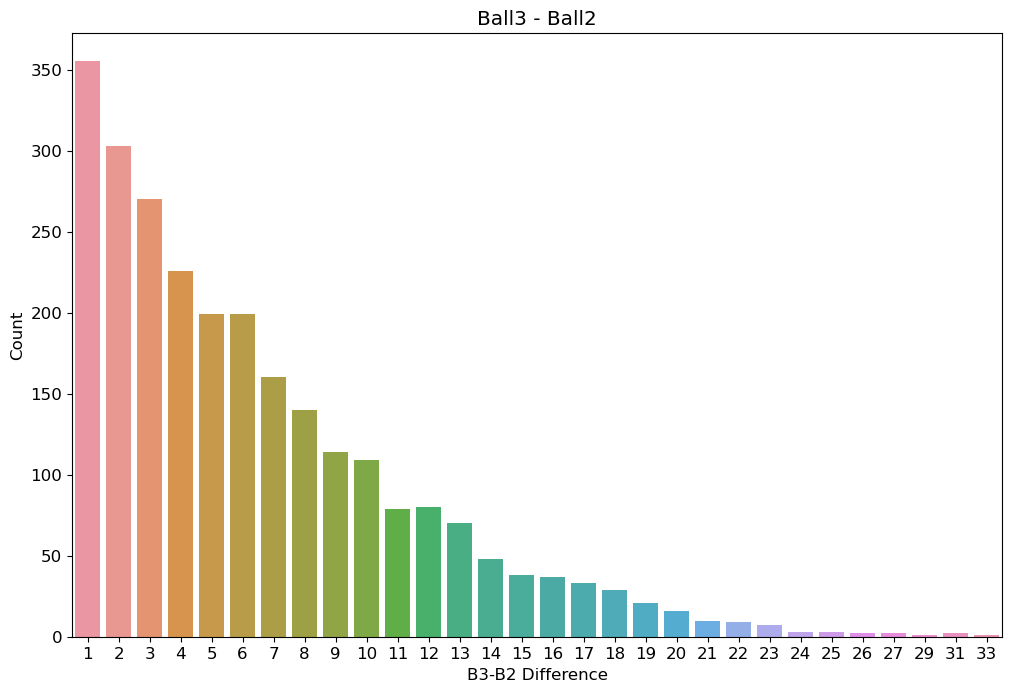

In [25]:
ax = sns.countplot(x="b3-b2", data=diff_df)
plt.xlabel('B3-B2 Difference')
plt.ylabel('Count')
plt.title('Ball3 - Ball2')

Text(0.5, 1.0, 'Ball4 - Ball3')

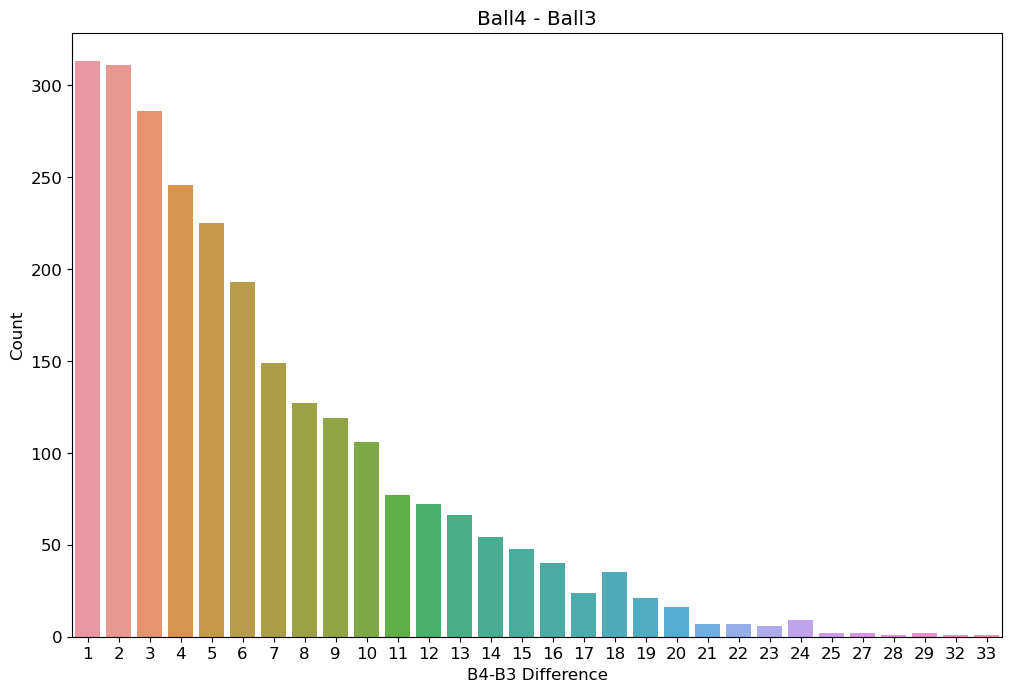

In [26]:
ax = sns.countplot(x="b4-b3", data=diff_df)
plt.xlabel('B4-B3 Difference')
plt.ylabel('Count')
plt.title('Ball4 - Ball3')

Text(0.5, 1.0, 'Ball5 - Ball4')

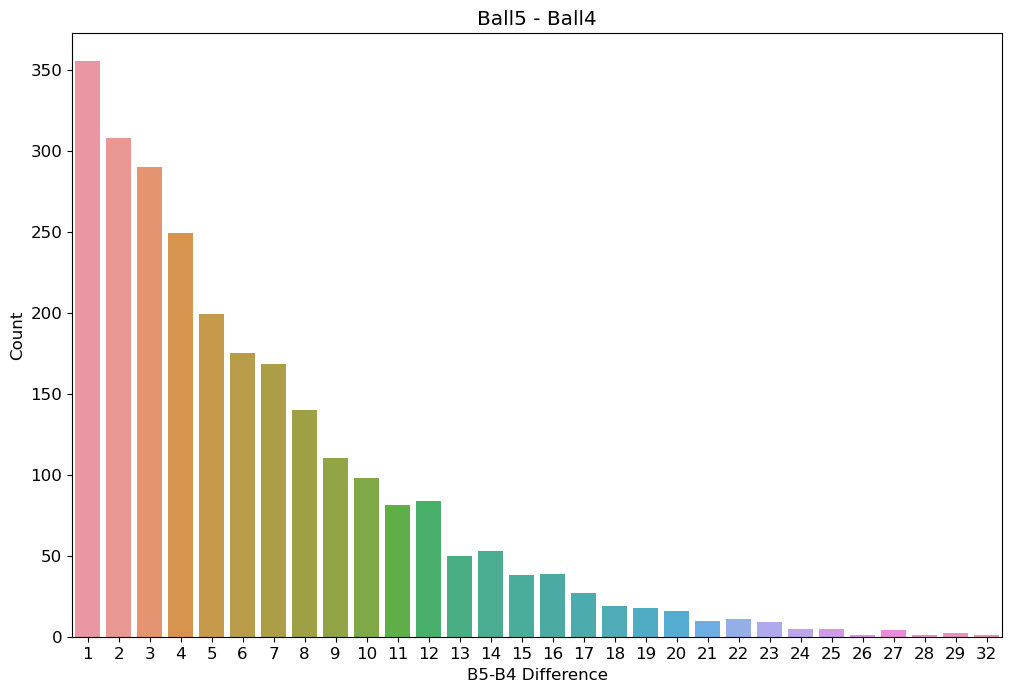

In [27]:
ax = sns.countplot(x="b5-b4", data=diff_df)
plt.xlabel('B5-B4 Difference')
plt.ylabel('Count')
plt.title('Ball5 - Ball4')

Text(0.5, 1.0, 'Ball6 - Ball5')

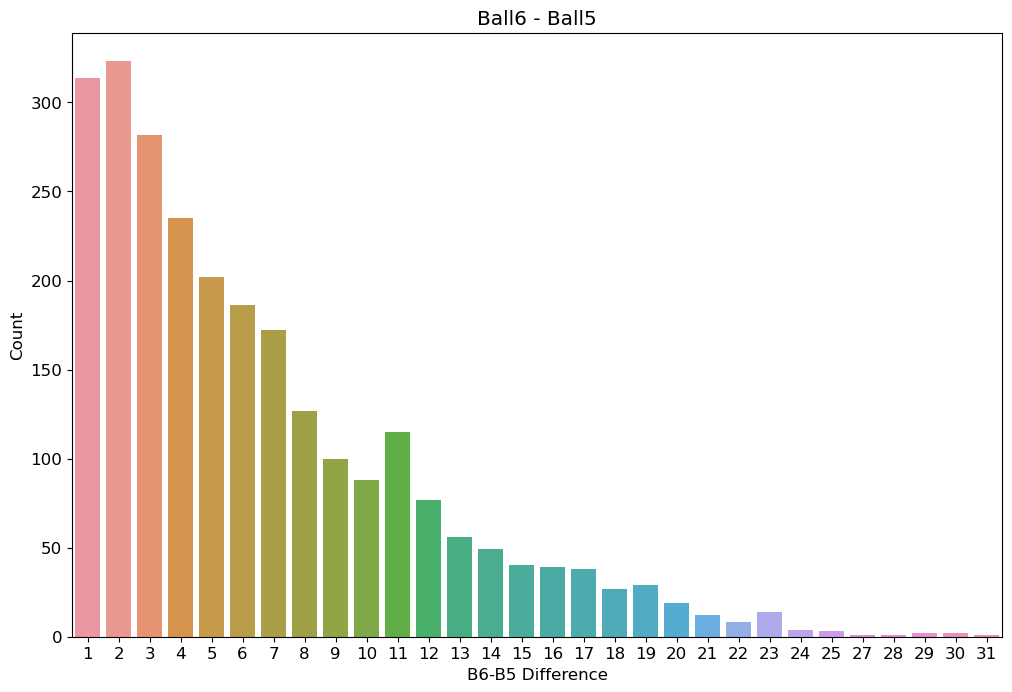

In [28]:
ax = sns.countplot(x="b6-b5", data=diff_df)
plt.xlabel('B6-B5 Difference')
plt.ylabel('Count')
plt.title('Ball6 - Ball5')

Text(0.5, 1.0, 'Total Difference')

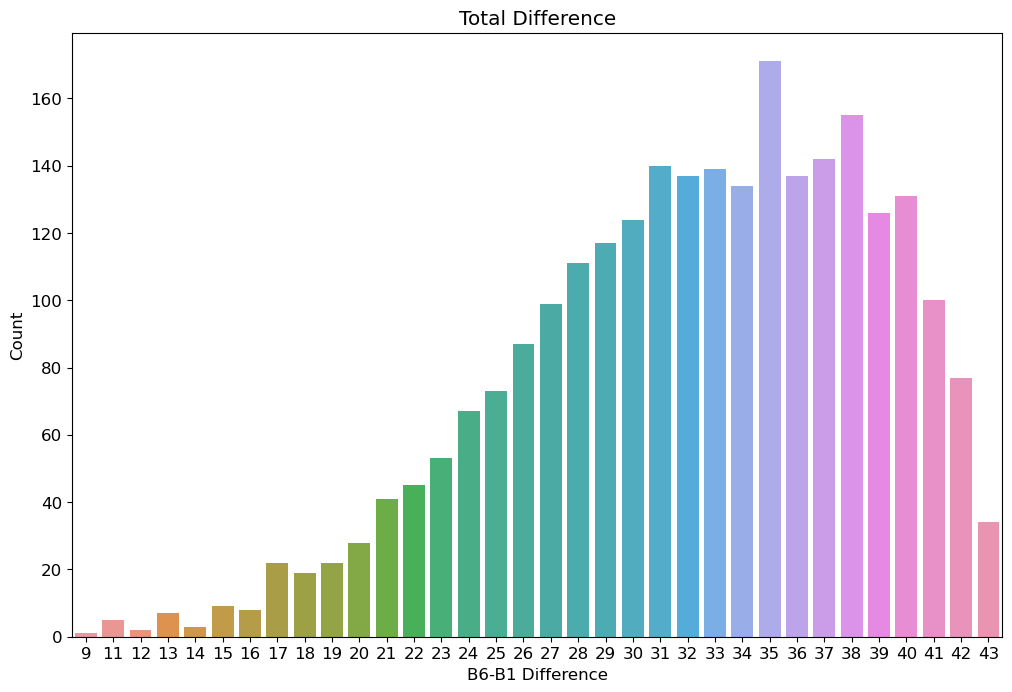

In [29]:
ax = sns.countplot(x="b6-b1", data=diff_df)
plt.xlabel('B6-B1 Difference')
plt.ylabel('Count')
plt.title('Total Difference')

In [30]:
winning_df=new_df.query('Jackpot_Winner==1')

In [31]:
winning_df

,Draw Date,NumbersInOrder,Jackpot_Winner,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6,Total
65,2021-12-22,9 -- 13 -- 15 -- 16 -- 41 -- 44,1,9,13,15,16,41,44,139.0
73,2021-11-24,13 -- 17 -- 18 -- 21 -- 39 -- 42,1,13,17,18,21,39,42,151.0
82,2021-10-23,8 -- 10 -- 13 -- 22 -- 25 -- 29,1,8,10,13,22,25,29,108.0
97,2021-09-01,2 -- 12 -- 18 -- 21 -- 29 -- 32,1,2,12,18,21,29,32,115.0
147,2021-03-10,1 -- 5 -- 13 -- 21 -- 27 -- 35,1,1,5,13,21,27,35,103.0
...,...,...,...,...,...,...,...,...,...,...
2501,1998-08-19,5 -- 10 -- 13 -- 19 -- 34 -- 43,1,5,10,13,19,34,43,125.0
2506,1998-08-01,4 -- 9 -- 25 -- 29 -- 37 -- 44,1,4,9,25,29,37,44,149.0
2510,1998-07-18,5 -- 7 -- 11 -- 21 -- 30 -- 36,1,5,7,11,21,30,36,111.0
2523,1998-06-03,10 -- 20 -- 25 -- 31 -- 40 -- 43,1,10,20,25,31,40,43,170.0


In [32]:
winning_df.describe()

,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6,Total
count,151.000000,151.000000,151.00000,151.000000,151.000000,151.000000,151.000000
mean,7.046358,12.682119,19.00000,25.198675,31.470199,38.370861,134.768212
std,5.954648,6.660702,7.59649,7.719257,7.150578,5.187955,32.335418
min,1.000000,2.000000,5.00000,8.000000,12.000000,22.000000,67.000000
25%,2.000000,7.000000,13.00000,19.000000,27.000000,35.000000,110.500000
50%,5.000000,12.000000,18.00000,25.000000,33.000000,40.000000,138.000000
75%,10.500000,17.000000,25.00000,31.000000,37.000000,43.000000,155.500000
max,27.000000,28.000000,35.00000,41.000000,42.000000,44.000000,204.000000


In [33]:
winning_df.head(15)

,Draw Date,NumbersInOrder,Jackpot_Winner,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6,Total
65,2021-12-22,9 -- 13 -- 15 -- 16 -- 41 -- 44,1,9,13,15,16,41,44,139.0
73,2021-11-24,13 -- 17 -- 18 -- 21 -- 39 -- 42,1,13,17,18,21,39,42,151.0
82,2021-10-23,8 -- 10 -- 13 -- 22 -- 25 -- 29,1,8,10,13,22,25,29,108.0
97,2021-09-01,2 -- 12 -- 18 -- 21 -- 29 -- 32,1,2,12,18,21,29,32,115.0
147,2021-03-10,1 -- 5 -- 13 -- 21 -- 27 -- 35,1,1,5,13,21,27,35,103.0
148,2021-03-06,5 -- 7 -- 22 -- 33 -- 34 -- 35,1,5,7,22,33,34,35,137.0
191,2020-10-07,3 -- 5 -- 13 -- 36 -- 41 -- 42,1,3,5,13,36,41,42,141.0
251,2020-03-11,11 -- 16 -- 23 -- 26 -- 31 -- 38,1,11,16,23,26,31,38,146.0
272,2019-12-28,2 -- 5 -- 9 -- 16 -- 21 -- 26,1,2,5,9,16,21,26,80.0
283,2019-11-20,8 -- 15 -- 24 -- 26 -- 28 -- 40,1,8,15,24,26,28,40,142.0


In [34]:
winner_counts = pd.DataFrame()


In [35]:
winning_df['Ball1'].value_counts()

2     23
1     19
5     14
3     14
4     12
6     10
11     8
9      7
10     6
12     5
8      4
7      4
13     4
20     3
19     3
15     2
14     2
22     2
21     2
16     2
17     2
27     1
24     1
18     1
Name: Ball1, dtype: int64

In [36]:
winning_df['Ball2'].value_counts()

5     13
7     10
13     8
17     8
10     8
9      8
16     8
14     8
4      8
11     7
15     7
8      6
24     6
6      6
12     6
3      5
18     5
21     5
20     4
25     3
23     3
26     3
19     2
27     2
28     1
2      1
Name: Ball2, dtype: int64

In [37]:
winning_df['Ball3'].value_counts()

18    10
22    10
19     9
16     8
13     7
25     7
26     7
17     7
31     7
27     6
8      6
10     6
12     6
15     5
28     5
6      5
14     5
11     5
24     5
5      4
21     3
33     3
20     3
29     3
9      2
23     2
30     2
35     1
34     1
32     1
Name: Ball3, dtype: int64

In [38]:
winning_df['Ball4'].value_counts()

21    11
29    10
33     9
19     8
34     8
25     8
31     8
30     8
22     7
18     6
27     5
16     5
24     5
26     5
35     5
32     4
15     4
8      4
36     4
23     3
13     3
17     3
20     3
41     3
28     3
9      2
38     2
12     2
14     2
37     1
Name: Ball4, dtype: int64

In [39]:
winning_df['Ball5'].value_counts()

36    12
29    11
37    10
32    10
35     9
39     9
41     9
34     9
27     8
25     8
40     6
30     5
38     5
23     5
31     4
33     4
21     3
24     3
42     3
19     3
26     3
17     2
15     2
16     1
22     1
18     1
13     1
28     1
12     1
14     1
20     1
Name: Ball5, dtype: int64

In [40]:
winning_df['Ball6'].value_counts()

42    21
43    21
44    18
38    12
37    10
41    10
40     9
39     7
33     6
34     6
32     5
35     5
30     5
29     4
36     3
26     2
28     2
22     1
24     1
25     1
31     1
27     1
Name: Ball6, dtype: int64

In [121]:
from functools import reduce

b1_win = winning_df['Ball1'].value_counts(dropna=False).sort_index(ascending = True).to_frame().reset_index()
b2_win = winning_df['Ball2'].value_counts(dropna=False).sort_index(ascending = True).to_frame().reset_index()
b3_win = winning_df['Ball3'].value_counts(dropna=False).sort_index(ascending = True).to_frame().reset_index()
b4_win = winning_df['Ball4'].value_counts(dropna=False).sort_index(ascending = True).to_frame().reset_index()
b5_win = winning_df['Ball5'].value_counts(dropna=False).sort_index(ascending = True).to_frame().reset_index()
b6_win = winning_df['Ball6'].value_counts(dropna=False).sort_index(ascending = True).to_frame().reset_index()

data_frames = [b1_win, b2_win, b3_win, b4_win, b5_win, b6_win]

winners_merged = reduce(lambda  left,right: pd.merge(left,right,on=['index'],
                                            how='outer'), data_frames).fillna('0')

with pd.ExcelWriter('/Users/billteller/Desktop/lotto_picks/winner_counts.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:  
    winners_merged.to_excel(writer, sheet_name = 'winning_number_counts')

winners_merged


,index,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6
0,1,19.0,0,0,0,0,0
1,2,23.0,1.0,0,0,0,0
2,3,14.0,5.0,0,0,0,0
3,4,12.0,8.0,0,0,0,0
4,5,14.0,13.0,4.0,0,0,0
5,6,10.0,6.0,5.0,0,0,0
6,7,4.0,10.0,0,0,0,0
7,8,4.0,6.0,6.0,4.0,0,0
8,9,7.0,8.0,2.0,2.0,0,0
9,10,6.0,8.0,6.0,0,0,0


In [122]:
winners_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   44 non-null     int64 
 1   Ball1   44 non-null     object
 2   Ball2   44 non-null     object
 3   Ball3   44 non-null     object
 4   Ball4   44 non-null     object
 5   Ball5   44 non-null     object
 6   Ball6   44 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.8+ KB


In [123]:
winners_merged.Ball1 = winners_merged.Ball1.astype('float')
winners_merged.Ball2 = winners_merged.Ball2.astype('float')
winners_merged.Ball3 = winners_merged.Ball3.astype('float')
winners_merged.Ball4 = winners_merged.Ball4.astype('float')
winners_merged.Ball5 = winners_merged.Ball5.astype('float')
winners_merged.Ball6 = winners_merged.Ball6.astype('float')

In [124]:
column_list= ['Ball1', 'Ball2', 'Ball3', 'Ball4', 'Ball5', 'Ball6']
winners_merged['Total'] = winners_merged[column_list].sum(axis=1)
winners_merged

,index,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6,Total
0,1,19.0,0.0,0.0,0.0,0.0,0.0,19.0
1,2,23.0,1.0,0.0,0.0,0.0,0.0,24.0
2,3,14.0,5.0,0.0,0.0,0.0,0.0,19.0
3,4,12.0,8.0,0.0,0.0,0.0,0.0,20.0
4,5,14.0,13.0,4.0,0.0,0.0,0.0,31.0
5,6,10.0,6.0,5.0,0.0,0.0,0.0,21.0
6,7,4.0,10.0,0.0,0.0,0.0,0.0,14.0
7,8,4.0,6.0,6.0,4.0,0.0,0.0,20.0
8,9,7.0,8.0,2.0,2.0,0.0,0.0,19.0
9,10,6.0,8.0,6.0,0.0,0.0,0.0,20.0


# Make predictions:

# Approach 1: sort out recent numbers

#Assumption 1: Numers will not quickly repeat 

In [42]:
recent=new_df.head(21)
recent

,Draw Date,NumbersInOrder,Jackpot_Winner,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6,Total
1,2022-08-03,6 -- 9 -- 18 -- 25 -- 26 -- 29,0,6,9,18,25,26,29,113.0
2,2022-07-30,7 -- 11 -- 16 -- 26 -- 38 -- 40,0,7,11,16,26,38,40,138.0
3,2022-07-27,5 -- 6 -- 9 -- 20 -- 22 -- 27,0,5,6,9,20,22,27,89.0
4,2022-07-23,1 -- 6 -- 13 -- 27 -- 35 -- 43,0,1,6,13,27,35,43,125.0
5,2022-07-20,14 -- 21 -- 22 -- 37 -- 42 -- 44,0,14,21,22,37,42,44,180.0
6,2022-07-16,3 -- 6 -- 20 -- 25 -- 31 -- 42,0,3,6,20,25,31,42,127.0
7,2022-07-13,3 -- 5 -- 19 -- 28 -- 40 -- 42,0,3,5,19,28,40,42,137.0
8,2022-07-09,14 -- 18 -- 35 -- 38 -- 39 -- 40,0,14,18,35,38,39,40,184.0
9,2022-07-06,1 -- 8 -- 11 -- 15 -- 20 -- 31,0,1,8,11,15,20,31,86.0
10,2022-07-02,3 -- 11 -- 21 -- 25 -- 33 -- 35,0,3,11,21,25,33,35,128.0


In [43]:
with pd.ExcelWriter('/Users/billteller/Desktop/lotto_picks/pick_sheet.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:  
    recent.to_excel(writer, sheet_name = 'recent_drawings')

(array([19144., 19158., 19174., 19188., 19205.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

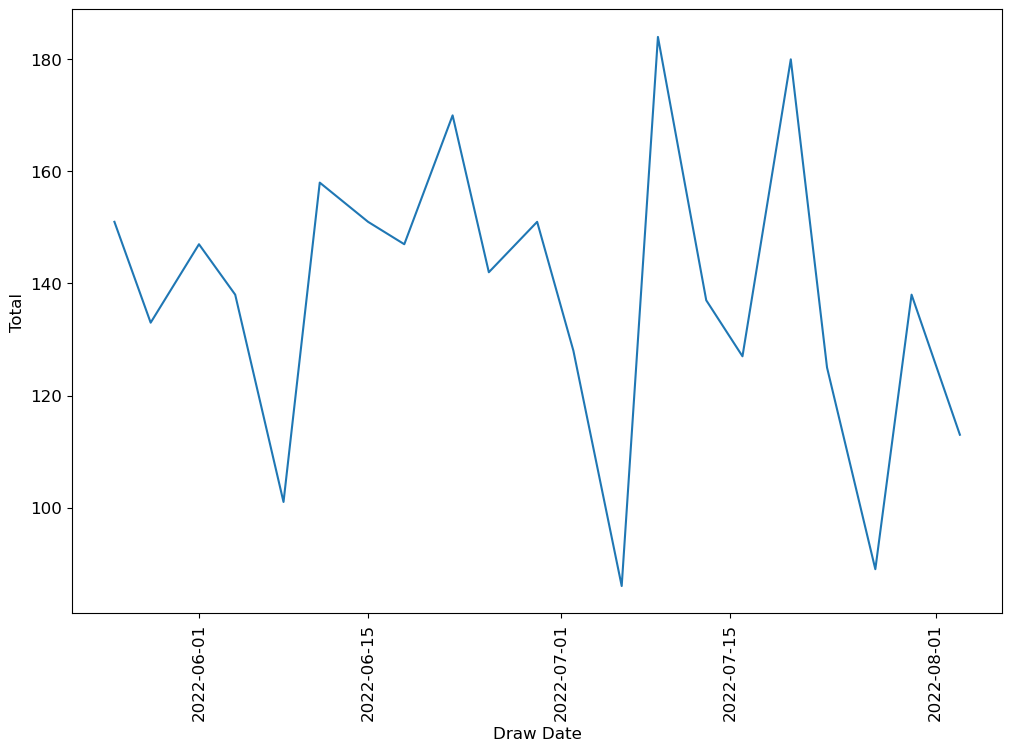

In [44]:
ln=sns.lineplot(data=recent, x="Draw Date", y="Total")
plt.xticks(rotation=90)

In [45]:
#what has been happening lately
#will means return to "natural position"?
recent.describe()

,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6,Total
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,6.761905,12.190476,19.428571,27.190476,33.476190,38.857143,137.904762
std,4.334798,5.418663,6.376295,5.954990,6.749956,5.072334,25.984428
min,1.000000,5.000000,9.000000,15.000000,20.000000,27.000000,86.000000
25%,3.000000,6.000000,16.000000,25.000000,31.000000,35.000000,127.000000
50%,6.000000,12.000000,19.000000,27.000000,34.000000,40.000000,138.000000
75%,10.000000,16.000000,22.000000,29.000000,39.000000,43.000000,151.000000
max,15.000000,23.000000,35.000000,38.000000,42.000000,44.000000,184.000000


In [46]:
#use a for loop to sort out recent numbers 
# recent is last 2 weeks
#try 2 approaches : put all into 1 set or keep in separate groups

In [47]:
todays_picks = []

In [48]:
ball1_recent=list(set(recent.Ball1))
ball2_recent=list(set(recent.Ball2))
ball3_recent=list(set(recent.Ball3))
ball4_recent=list(set(recent.Ball4))
ball5_recent=list(set(recent.Ball5))
ball6_recent=list(set(recent.Ball6))

picks_all=[]
picks_v1=[]
picks_v2=[]
picks_v3=[]
picks_v4=[]
picks_v5=[]
picks_v6=[]

for ball1_picks in range(1, 13):
    if ball1_picks not in ball1_recent:
        picks_v1.append(ball1_picks)
        picks_all.append(ball1_picks)
for ball2_picks in range(5,17):
    if ball2_picks not in ball2_recent:
        picks_v2.append(ball2_picks)
        picks_all.append(ball2_picks)
for ball3_picks in range(9, 23):
    if ball3_picks not in ball3_recent:
        picks_v3.append(ball3_picks)
        picks_all.append(ball3_picks)
for ball4_picks in range(11, 41):
    if ball4_picks not in ball4_recent:
        picks_v4.append(ball4_picks)
        picks_all.append(ball4_picks)
for ball5_picks in range(20, 41):
    if ball5_picks not in ball5_recent:
        picks_v5.append(ball5_picks)
        picks_all.append(ball5_picks)
for ball6_picks in range(27, 45):
    if ball6_picks not in ball6_recent:
        picks_v6.append(ball6_picks)
        picks_all.append(ball6_picks)
        
print(picks_v1,picks_v2,picks_v3,picks_v4,picks_v5,picks_v6)

[8, 9] [7, 10, 13, 15] [10, 12, 14, 15] [11, 12, 13, 14, 17, 18, 19, 21, 22, 23, 30, 31, 32, 33, 35, 39, 40] [21, 23, 24, 25, 27, 28, 30] [28, 30, 32, 33, 36, 37, 39]


In [49]:
picks_not_recent = list(set(picks_all))
print(picks_not_recent, end = ' ')

[7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, 25, 27, 28, 30, 31, 32, 33, 35, 36, 37, 39, 40] 

In [50]:
len(picks_not_recent)

28

In [51]:
ball1_recent=list(set(recent.Ball1))
ball2_recent=list(set(recent.Ball2))
ball3_recent=list(set(recent.Ball3))
ball4_recent=list(set(recent.Ball4))
ball5_recent=list(set(recent.Ball5))

picks_total=[]
picks_b1=[]
picks_b2=[]
picks_b3=[]
picks_b4=[]
picks_b5=[]
picks_b6=[]

for ball1_picks in range(1, 13):
    if ball1_picks in ball1_recent:
        picks_b1.append(ball1_picks)
        picks_total.append(ball1_picks)
for ball2_picks in range(5,17):
    if ball2_picks in ball2_recent:
        picks_b2.append(ball2_picks)
        picks_total.append(ball2_picks)
for ball3_picks in range(9, 22):
    if ball3_picks in ball3_recent:
        picks_b3.append(ball3_picks)
        picks_total.append(ball3_picks)
for ball4_picks in range(11, 30):
    if ball4_picks in ball4_recent:
        picks_b4.append(ball4_picks)
        picks_total.append(ball4_picks)
for ball5_picks in range(20, 41):
    if ball5_picks in ball5_recent:
        picks_b5.append(ball5_picks)
        picks_total.append(ball5_picks)
for ball6_picks in range(27, 45):
    if ball6_picks in ball6_recent:
        picks_b6.append(ball6_picks)
        picks_total.append(ball6_picks)

In [52]:
print(picks_b6)

[27, 29, 31, 34, 35, 38, 40, 41, 42, 43, 44]


In [53]:
picks_recent = list(set(picks_total))
print(picks_recent, end = ' ')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44] 

In [54]:
print(len(picks_recent))

42


In [55]:
import random

In [56]:
#recents sorted out
# for i in range(5):
a=(random.sample(picks_b1, k=1))
while True:
    a1=(random.sample(picks_b2, k=1))
    if a1>a:
        break
while True:
    a2=(random.sample(picks_b3, k=1))
    if a2>a1:
        break
while True:
    a3=(random.sample(picks_b4, k=1))
    if a3>a2:
        break
while True:
    a4=(random.sample(picks_b5, k=1))
    if a4>a3:
        break
while True:
    a5=(random.sample(picks_b6, k=1))
    if a5>a4:
        break

selections = [a, a1, a2, a3, a4, a5] 
print("Random Selection of recents:", selections)
a_all = a+a1+a2+a3+a4+a5
print("Sum of Selection:", sum(a_all))
todays_picks.append(a_all)

Random Selection of recents: [[4], [8], [17], [29], [36], [44]]
Sum of Selection: 138


In [57]:
# b=(random.sample(picks_v1, k=1))
# while True:
#     b1=(random.sample(picks_v2, k=1))
# #     if b1>b:
# #         break
# while True:
#     b2=(random.sample(picks_v3, k=1))
# #     if b2>b1:
# #         break
# while True:
#     b3=(random.sample(picks_v4, k=1))
# #     if b3>b2:
# #         break
# while True:
#     b4=(random.sample(picks_v5, k=1))
# #     if b4>b3:
# #         break
# while True:
#     b5=(random.sample(picks_v6, k=1))
# #     if b5>b4:
# #         break

# selections = [b, b1, b2, b3, b4, b5] 
# print("Random Selection of non-recents:", selections)
# b_all = b+b1+b2+b3+b4+b5
# print("Sum of Selection:", sum(b_all))
# todays_picks.append(b_all)

In [58]:
# c=(random.sample(picks_b1, k=1))
# while True:
#     c1=(random.sample(picks_b2, k=1))
#     if c1>c:
#         break
# while True:
#     c2=(random.sample(picks_v3, k=1))
#     if c2>c1:
#         break
# while True:
#     c3=(random.sample(picks_v4, k=1))
#     if c3>c2:
#         break
# while True:
#     c4=(random.sample(picks_v5, k=1))
#     if c4>c3:
#         break
# while True:
#     c5=(random.sample(picks_b6, k=1))
#     if c5>c4:
#         break

# selections = [c, c1, c2, c3, c4, c5] 
# print("Random Selection of mixed:", selections)
# c_all = c+c1+c2+c3+c4+c5
# print("Sum of Selection:", sum(c_all))
# todays_picks.append(c_all)

In [59]:
for i in range(5):
    sample_size = 6
    rand_select = [picks_not_recent[i] for i in sorted(random.sample(range(len(picks_not_recent)), sample_size))]
    print("Random Selection of recents:", rand_select)
    print("Sum of Selection:", sum(rand_select))
    todays_picks.append(rand_select)

Random Selection of recents: [19, 25, 28, 31, 33, 37]
Sum of Selection: 173
Random Selection of recents: [8, 19, 23, 28, 36, 40]
Sum of Selection: 154
Random Selection of recents: [13, 19, 28, 30, 35, 36]
Sum of Selection: 161
Random Selection of recents: [8, 15, 18, 19, 32, 40]
Sum of Selection: 132
Random Selection of recents: [12, 23, 27, 28, 30, 35]
Sum of Selection: 155


In [60]:
for i in range(5):
    sample_size = 6
    rand_select = [picks_recent[i] for i in sorted(random.sample(range(len(picks_recent)), sample_size))]
    print("Random Selection of recents:", rand_select)
    print("Sum of Selection:", sum(rand_select))
    todays_picks.append(rand_select)

Random Selection of recents: [12, 15, 17, 31, 43, 44]
Sum of Selection: 162
Random Selection of recents: [3, 5, 6, 9, 14, 21]
Sum of Selection: 58
Random Selection of recents: [7, 11, 15, 22, 25, 27]
Sum of Selection: 107
Random Selection of recents: [4, 5, 6, 11, 14, 38]
Sum of Selection: 78
Random Selection of recents: [1, 6, 7, 15, 18, 26]
Sum of Selection: 73


In [61]:
for i in range(5):
    random_picks=sorted(random.sample(range(1,45), k=6)) 
    print("Random Selection: ",random_picks)
    print("Sum of Selection:", sum(random_picks))
    todays_picks.append(random_picks)

Random Selection:  [5, 8, 10, 11, 40, 43]
Sum of Selection: 117
Random Selection:  [2, 8, 11, 15, 33, 40]
Sum of Selection: 109
Random Selection:  [3, 15, 17, 18, 37, 44]
Sum of Selection: 134
Random Selection:  [12, 14, 18, 27, 38, 43]
Sum of Selection: 152
Random Selection:  [1, 9, 11, 13, 28, 41]
Sum of Selection: 103


# Approach 2: Index Position Sort

In [62]:
#instead of trying to sort out the recently drawn numbers, 
#look for the ones that haven't been drawn in the longest time.
#in other words, sort by index position
#this is an extension of assumption 1:  numbers will not quickly repeat

In [63]:
Ball1=list(new_df.Ball1)
Ball2=list(new_df.Ball2)
Ball3=list(new_df.Ball3)
Ball4=list(new_df.Ball4)
Ball5=list(new_df.Ball5)
Ball6=list(new_df.Ball6)

In [64]:
key=(range(1,21))
ball1_sort=[]
for i in range (1,21):
    position = Ball1.index(i)+1
    ball1_sort.append(position)
ball1_dict=dict(zip(key, ball1_sort))

In [65]:
b1_picks=[]
for value in sorted(ball1_dict.values()):
    for key in ball1_dict.keys():
        if ball1_dict[key] == value:
            b1_picks.append(key)
            print(key, value)

6 1
7 2
5 3
1 4
14 5
3 6
11 13
4 14
10 15
2 18
15 19
12 21
8 23
9 32
16 51
18 61
13 73
17 138
19 269
20 614


In [66]:
key=(range(2,31))
ball2_sort=[]
for i in range (2,31):
    position = Ball2.index(i)+1
    ball2_sort.append(position)
ball2_dict=dict(zip(key, ball2_sort))

In [67]:
b2_picks=[]
for value in sorted(ball2_dict.values()):
    for key in ball2_dict.keys():
        if ball2_dict[key] == value:
            b2_picks.append(key)
            print(key, value)

9 1
11 2
6 3
21 5
5 7
18 8
8 9
12 11
14 12
17 13
23 15
16 16
15 23
24 24
7 27
13 28
3 34
10 36
4 39
20 49
25 51
19 58
22 76
2 98
26 137
27 161
30 177
28 181
29 297


In [68]:
key=(range(3,36))
ball3_sort=[]
for i in range (3,36):
    position = Ball3.index(i)+1
    ball3_sort.append(position)
ball3_dict=dict(zip(key, ball3_sort))

In [69]:
b3_picks=[]
for value in sorted(ball3_dict.values()):
    for key in ball3_dict.keys():
        if ball3_dict[key] == value:
            b3_picks.append(key)
            print(key, value)

18 1
16 2
9 3
13 4
22 5
20 6
19 7
35 8
11 9
21 10
31 13
23 14
24 15
17 16
10 22
25 24
12 35
27 38
34 40
15 42
26 45
29 49
14 52
8 57
33 67
7 79
6 93
5 94
30 111
32 128
4 144
28 182
3 526


In [70]:
key=(range(6,41))
ball4_sort=[]
for i in range (6,41):
        position = Ball4.index(i)+1
        ball4_sort.append(position) 
ball4_dict=dict(zip(key, ball4_sort))
ball4_dict

{6: 350,
 7: 198,
 8: 79,
 9: 117,
 10: 135,
 11: 22,
 12: 29,
 13: 179,
 14: 250,
 15: 9,
 16: 17,
 17: 35,
 18: 23,
 19: 31,
 20: 3,
 21: 57,
 22: 47,
 23: 26,
 24: 20,
 25: 1,
 26: 2,
 27: 4,
 28: 7,
 29: 11,
 30: 32,
 31: 43,
 32: 58,
 33: 45,
 34: 13,
 35: 67,
 36: 16,
 37: 5,
 38: 8,
 39: 177,
 40: 96}

In [71]:
b4_picks=[]
for value in sorted(ball4_dict.values()):
    for key in ball4_dict.keys():
        if ball4_dict[key] == value:
            b4_picks.append(key)
            print(key, value)

25 1
26 2
20 3
27 4
37 5
28 7
38 8
15 9
29 11
34 13
36 16
16 17
24 20
11 22
18 23
23 26
12 29
19 31
30 32
17 35
31 43
33 45
22 47
21 57
32 58
35 67
8 79
40 96
9 117
10 135
39 177
13 179
7 198
14 250
6 350


In [72]:
key=(range(11,44))
ball5_sort=[]
for i in range (11,44):
        position = Ball5.index(i)+1
        ball5_sort.append(position) 
ball5_dict=dict(zip(key, ball5_sort))
ball5_dict

{11: 1265,
 12: 942,
 13: 444,
 14: 658,
 15: 79,
 16: 98,
 17: 62,
 18: 35,
 19: 408,
 20: 9,
 21: 41,
 22: 3,
 23: 72,
 24: 23,
 25: 82,
 26: 1,
 27: 48,
 28: 31,
 29: 19,
 30: 24,
 31: 6,
 32: 20,
 33: 10,
 34: 14,
 35: 4,
 36: 13,
 37: 12,
 38: 2,
 39: 8,
 40: 7,
 41: 11,
 42: 5,
 43: 38}

In [73]:
b5_picks=[]
for value in sorted(ball5_dict.values()):
    for key in ball5_dict.keys():
        if ball5_dict[key] == value:
            b5_picks.append(key)
            print(key, value)

26 1
38 2
22 3
35 4
42 5
31 6
40 7
39 8
20 9
33 10
41 11
37 12
36 13
34 14
29 19
32 20
24 23
30 24
28 31
18 35
43 38
21 41
27 48
17 62
23 72
15 79
25 82
16 98
19 408
13 444
14 658
12 942
11 1265


In [74]:
key=(range(18,45))
ball6_sort=[]
for i in range (18,45):
        position = Ball6.index(i)+1
        ball6_sort.append(position) 
ball6_dict=dict(zip(key, ball6_sort))
ball6_dict

{18: 1202,
 19: 388,
 20: 453,
 21: 1057,
 22: 543,
 23: 117,
 24: 35,
 25: 66,
 26: 272,
 27: 3,
 28: 23,
 29: 1,
 30: 100,
 31: 9,
 32: 25,
 33: 24,
 34: 20,
 35: 10,
 36: 27,
 37: 30,
 38: 19,
 39: 33,
 40: 2,
 41: 13,
 42: 6,
 43: 4,
 44: 5}

In [75]:
b6_picks=[]
for value in sorted(ball6_dict.values()):
    for key in ball6_dict.keys():
        if ball6_dict[key] == value:
            b6_picks.append(key)
            print(key, value)

29 1
40 2
27 3
43 4
44 5
42 6
31 9
35 10
41 13
38 19
34 20
28 23
33 24
32 25
36 27
37 30
39 33
24 35
25 66
30 100
23 117
26 272
19 388
20 453
22 543
21 1057
18 1202


In [76]:
b1_all=b1_picks[:]
print(b1_all)

[6, 7, 5, 1, 14, 3, 11, 4, 10, 2, 15, 12, 8, 9, 16, 18, 13, 17, 19, 20]


In [77]:
b1_picks_recent=b1_picks[:5]
print(b1_picks_recent)

[6, 7, 5, 1, 14]


In [78]:
b1_picks_oldest=b1_picks[-5:]
print(b1_picks_oldest)

[18, 13, 17, 19, 20]


In [79]:
#slice by index position
b1_picks_recent=b1_picks[:8]
b1_picks_middle=b1_picks[6:17]
b1_picks_oldest=b1_picks[-3:]
b1_picks_all=b1_picks[:]

b2_picks_recent=b2_picks[:14]
b2_picks_middle=b2_picks[12:23]
b2_picks_oldest=b2_picks[-6:]
b2_picks_all=b2_picks[:]

b3_picks_recent=b3_picks[:15]
b3_picks_middle=b3_picks[13:31]
b3_picks_oldest=b3_picks[-3:]
b3_picks_all=b3_picks[:]

b4_picks_recent=b4_picks[:12]
b4_picks_middle=b4_picks[10:26]
b4_picks_oldest=b4_picks[-9:]
b4_picks_all=b4_picks[:]

b5_picks_recent=b5_picks[:17]
b5_picks_middle=b5_picks[15:29]
b5_picks_oldest=b5_picks[-5:]
b5_picks_all=b5_picks[:]

b6_picks_recent=b6_picks[:11]
b6_picks_middle=b6_picks[9:22]
b6_picks_oldest=b6_picks[-6:] # don't use these
b6_picks_all=b6_picks[:]

In [80]:
b1_picks_fresh=b1_picks[:8]
b1_picks_ripe=b1_picks[8:]

b2_picks_fresh=b2_picks[:13]
b2_picks_ripe=b2_picks[13:]

b3_picks_fresh=b3_picks[:16]
b3_picks_ripe=b3_picks[16:]

b4_picks_fresh=b4_picks[:13]
b4_picks_ripe=b4_picks[13:]

b5_picks_fresh=b5_picks[:17]
b5_picks_ripe=b5_picks[17:]

b6_picks_fresh=b6_picks[:11]
b6_picks_ripe=b6_picks[11:]

#make predictions using the index position sort

In [81]:
#all middle index positions
x=(random.sample(b1_picks_recent, k=1))
while True:
    x1=(random.sample(b2_picks_recent, k=1))
    if x1>x:
        break
while True:
    x2=(random.sample(b3_picks_recent, k=1))
    if x2>x1:
        break
while True:
    x3=(random.sample(b4_picks_recent, k=1))
    if x3>x2:
        break
while True:
    x4=(random.sample(b5_picks_recent, k=1))
    if x4>x3:
        break
while True:
    x5=(random.sample(b6_picks_recent, k=1))
    if x5>x4:
        break
print("Random Selection variation 1:", x, x1, x2, x3, x4, x5)
x_all = x+x1+x2+x3+x4+x5
print("Sum of Selection:", sum(x_all))
todays_picks.append(x_all)

Random Selection variation 1: [4] [6] [19] [29] [35] [38]
Sum of Selection: 131


In [82]:
#ball1 and ball5 recent
y=(random.sample(b1_picks_recent, k=1))
while True:
    y1=(random.sample(b2_picks_recent, k=1))
    if y1>y:
        break
while True:
    y2=(random.sample(b3_picks_middle, k=1))
    if y2>y1:
        break
while True:
    y3=(random.sample(b4_picks_middle, k=1))
    if y3>y2:
        break
while True:
    y4=(random.sample(b5_picks_recent, k=1))
    if y4>y3:
        break
while True:
    y5=(random.sample(b6_picks_recent, k=1))
    if y5>y4:
        break
print("Random Selection variation 2:", y, y1, y2, y3, y4, y5)
y_all = y+y1+y2+y3+y4+y5
print("Sum of Selection:", sum(y_all))
todays_picks.append(y_all)

Random Selection variation 2: [7] [15] [26] [33] [34] [40]
Sum of Selection: 155


In [83]:
z=(random.sample(b1_picks_middle, k=1))
while True:
    z1=(random.sample(b2_picks_middle, k=1))
    if z1>z:
        break
while True:
    z2=(random.sample(b3_picks_middle, k=1))
    if z2>z1:
        break
while True:
    z3=(random.sample(b4_picks_middle, k=1))
    if z3>z2:
        break
while True:
    z4=(random.sample(b5_picks_middle, k=1))
    if z4>z3:
        break
while True:
    z5=(random.sample(b6_picks_recent, k=1))
    if z5>z4:
        break
print("Random Selection variation 3:", z, z1, z2, z3, z4, z5)
z_all = z+z1+z2+z3+z4+z5
print("Sum of Selection:", sum(z_all))
todays_picks.append(z_all)

Random Selection variation 3: [11] [13] [30] [33] [43] [44]
Sum of Selection: 174


In [84]:
pick_these = pd.DataFrame(todays_picks, columns = ['Ball1','Ball2','Ball3','Balll4','Ball5','Ball6'])

In [85]:
pick_cols = list(pick_these.columns)
pick_these['Total'] = pick_these[pick_cols].sum(axis = 1)
pick_these.sort_values(by='Total', ascending=True, inplace = True)
pick_these

,Ball1,Ball2,Ball3,Balll4,Ball5,Ball6,Total
7,3,5,6,9,14,21,58
10,1,6,7,15,18,26,73
9,4,5,6,11,14,38,78
15,1,9,11,13,28,41,103
8,7,11,15,22,25,27,107
12,2,8,11,15,33,40,109
11,5,8,10,11,40,43,117
16,4,6,19,29,35,38,131
4,8,15,18,19,32,40,132
13,3,15,17,18,37,44,134


In [86]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
# pick_these.to_excel('/Users/billteller/Desktop/pick_sheet.xlsx', sheet_name = timestr)
with pd.ExcelWriter('/Users/billteller/Desktop/lotto_picks/pick_sheet.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:  
    pick_these.to_excel(writer, sheet_name = timestr)

# Approach 3: find combinations to target Sums within 1 std

In [87]:
mean_sort=new_df.query('Total>105 & Total<165')

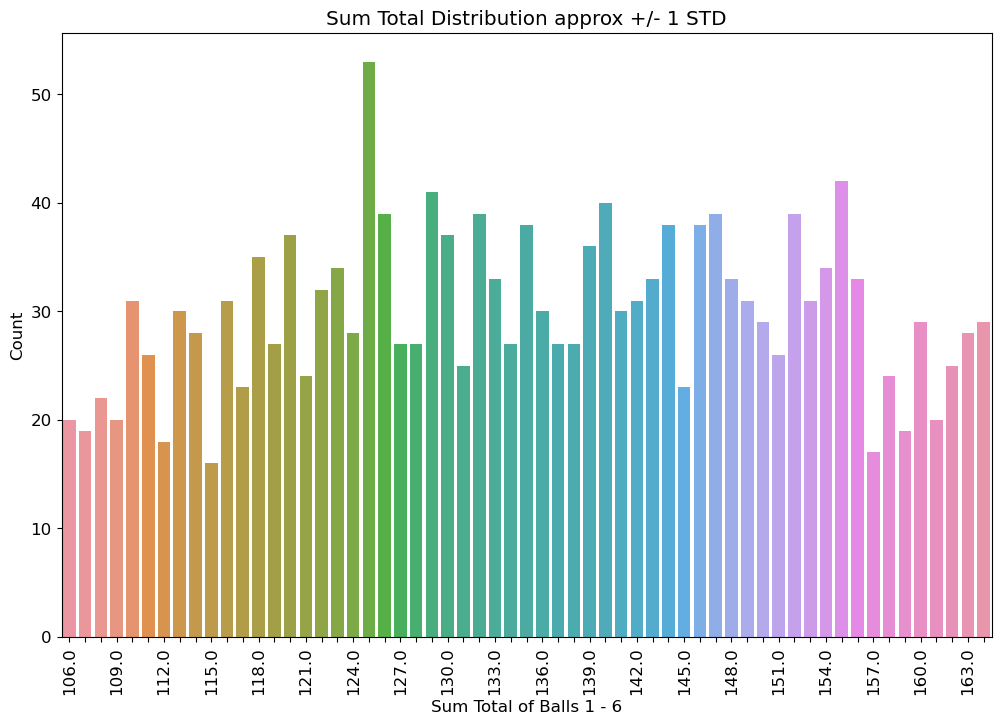

In [88]:
#sns.countplot xrange: 105 - 165
ax = sns.countplot(x="Total", data=mean_sort)
plt.xlabel('Sum Total of Balls 1 - 6')
plt.ylabel('Count')
plt.title('Sum Total Distribution approx +/- 1 STD')
plt.xticks(rotation=90)
for ax, label in enumerate(ax.get_xticklabels()):
    if ax % 3 == 0:  # every @nd label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [89]:
#most popular sum
new_df.query('Total==125').head(15)

,Draw Date,NumbersInOrder,Jackpot_Winner,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6,Total
4,2022-07-23,1 -- 6 -- 13 -- 27 -- 35 -- 43,0,1,6,13,27,35,43,125.0
26,2022-05-07,6 -- 16 -- 19 -- 23 -- 30 -- 31,0,6,16,19,23,30,31,125.0
33,2022-04-13,3 -- 6 -- 10 -- 30 -- 37 -- 39,0,3,6,10,30,37,39,125.0
75,2021-11-17,7 -- 15 -- 19 -- 20 -- 31 -- 33,0,7,15,19,20,31,33,125.0
202,2020-08-29,5 -- 8 -- 10 -- 30 -- 31 -- 41,0,5,8,10,30,31,41,125.0
241,2020-04-15,8 -- 9 -- 22 -- 27 -- 28 -- 31,0,8,9,22,27,28,31,125.0
243,2020-04-08,6 -- 13 -- 18 -- 22 -- 28 -- 38,0,6,13,18,22,28,38,125.0
273,2019-12-25,6 -- 8 -- 14 -- 24 -- 32 -- 41,0,6,8,14,24,32,41,125.0
294,2019-10-12,7 -- 15 -- 23 -- 24 -- 25 -- 31,0,7,15,23,24,25,31,125.0
406,2018-09-15,2 -- 6 -- 18 -- 23 -- 34 -- 42,0,2,6,18,23,34,42,125.0


In [90]:
#plug&play query
new_df.query('Total==115')

,Draw Date,NumbersInOrder,Jackpot_Winner,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6,Total
22,2022-05-21,2 -- 9 -- 10 -- 11 -- 40 -- 43,0,2,9,10,11,40,43,115.0
97,2021-09-01,2 -- 12 -- 18 -- 21 -- 29 -- 32,1,2,12,18,21,29,32,115.0
225,2020-06-10,1 -- 3 -- 15 -- 29 -- 33 -- 34,0,1,3,15,29,33,34,115.0
291,2019-10-23,2 -- 8 -- 10 -- 13 -- 39 -- 43,0,2,8,10,13,39,43,115.0
538,2017-06-10,1 -- 13 -- 16 -- 20 -- 22 -- 43,0,1,13,16,20,22,43,115.0
564,2017-03-11,2 -- 14 -- 18 -- 25 -- 26 -- 30,0,2,14,18,25,26,30,115.0
840,2014-07-19,6 -- 7 -- 11 -- 23 -- 31 -- 37,0,6,7,11,23,31,37,115.0
953,2013-06-19,2 -- 11 -- 12 -- 23 -- 28 -- 39,0,2,11,12,23,28,39,115.0
987,2013-02-20,8 -- 9 -- 22 -- 23 -- 26 -- 27,0,8,9,22,23,26,27,115.0
1289,2010-03-31,3 -- 8 -- 17 -- 21 -- 24 -- 42,0,3,8,17,21,24,42,115.0


In [91]:
# sort the Total index position
total_sum=list(new_df.Total)

total_sort=[]
for i in range (80,185):
    try:
        position = total_sum.index(i)+1
        total_sort.append(position)
        print(i, position)
    except ValueError:
        print(i, "Not in list")
        continue

80 272
81 240
82 79
83 93
84 66
85 178
86 9
87 172
88 62
89 3
90 317
91 136
92 389
93 84
94 372
95 463
96 139
97 112
98 78
99 583
100 281
101 17
102 29
103 72
104 71
105 549
106 116
107 64
108 41
109 179
110 23
111 81
112 27
113 1
114 184
115 22
116 44
117 46
118 119
119 83
120 122
121 190
122 195
123 90
124 54
125 4
126 52
127 6
128 10
129 30
130 34
131 60
132 77
133 20
134 25
135 104
136 37
137 7
138 2
139 65
140 86
141 191
142 12
143 92
144 39
145 162
146 45
147 14
148 120
149 32
150 110
151 11
152 42
153 258
154 58
155 99
156 95
157 49
158 16
159 339
160 24
161 183
162 61
163 142
164 88
165 343
166 140
167 85
168 38
169 207
170 13
171 137
172 215
173 111
174 67
175 269
176 719
177 161
178 185
179 217
180 5
181 820
182 50
183 1376
184 8


In [92]:
key=(range(80,185))
total_sort=[]
for i in range (80,185):
    try:
        position = total_sum.index(i)+1
        total_sort.append(position)
        total_dict=dict(zip(key, total_sort))
    except ValueError:
        continue
        
total_picks=[]
for value in sorted(total_dict.values()):
    for key in total_dict.keys():
        if total_dict[key] == value:
            total_picks.append(key)
            print(key, value)

113 1
138 2
89 3
125 4
180 5
127 6
137 7
184 8
86 9
128 10
151 11
142 12
170 13
147 14
158 16
101 17
133 20
115 22
110 23
160 24
134 25
112 27
102 29
129 30
149 32
130 34
136 37
168 38
144 39
108 41
152 42
116 44
146 45
117 46
157 49
182 50
126 52
124 54
154 58
131 60
162 61
88 62
107 64
139 65
84 66
174 67
104 71
103 72
132 77
98 78
82 79
111 81
119 83
93 84
167 85
140 86
164 88
123 90
143 92
83 93
156 95
155 99
135 104
150 110
173 111
97 112
106 116
118 119
148 120
120 122
91 136
171 137
96 139
166 140
163 142
177 161
145 162
87 172
85 178
109 179
161 183
114 184
178 185
121 190
141 191
122 195
169 207
172 215
179 217
81 240
153 258
175 269
80 272
100 281
90 317
159 339
165 343
94 372
92 389
95 463
105 549
99 583
176 719
181 820
183 1376


In [93]:
#reminder!
#for total: 68%, 1 std, of all totals are equal to approx 105 - 165
#for total: 95%, 2 std, of all totals are equal to approx 75 - 195

In [94]:
import itertools

#create a function to target different sums with index position sort as the numeric input

v1 = all numbers

v2 = middle indexed positions

v3 = b5 recent, b4-b2 are middile index position

v4 = oldest index positions

In [95]:
#targets: 115 , 157, 

In [96]:
#working from Ball6 down to Ball1 seemsed to work the best
def gen_combo_target_v1(s):
    for a in b6_picks_all:
        s2 = s - a
        for b in b5_picks_all:
            s3 = s2 - b
            for c in b4_picks_all:
                s4 = s3 - c
                for d in b3_picks_all:
                    s5 = s4 - d
                    for e in b2_picks_all:
                        s6 = s5 - e
                        yield ( s - a - b - c - d -e, e, d, c, b, a)

In [97]:
def gen_combo_target_v2(s):
    for a in b6_picks_middle:
        s2 = s - a
        for b in b5_picks_middle:
            s3 = s2 - b
            for c in b4_picks_middle:
                s4 = s3 - c
                for d in b3_picks_middle:
                    s5 = s4 - d
                    for e in b2_picks_middle:
                        s6 = s5 - e
                        yield ( s - a - b - c - d -e, e, d, c, b, a)

In [98]:
def gen_combo_target_v3(s):
    for a in b6_picks_recent:
        s2 = s - a
        for b in b5_picks_middle:
            s3 = s2 - b
            for c in b4_picks_middle:
                s4 = s3 - c
                for d in b3_picks_middle:
                    s5 = s4 - d
                    for e in b2_picks_middle:
                        s6 = s5 - e
                        yield ( s - a - b - c - d -e, e, d, c, b, a)

In [99]:
def gen_combo_target_v4(s):
    for a in b6_picks_all:
        s2 = s - a
        for b in b5_picks_all:
            s3 = s2 - b
            for c in b4_picks_all:
                s4 = s3 - c
                for d in b3_picks_oldest:
                    s5 = s4 - d
                    for e in b2_picks_all:
                        s6 = s5 - e
                        yield ( s - a - b - c - d -e, e, d, c, b, a)

In [100]:
combo_115=list(gen_combo_target_v2(115))
combo_115_df = pd.DataFrame (combo_115, columns = ['Ball1', 'Ball2', 'Ball3', 'Ball4', 'Ball5', 'Ball6'])
combo_115_df.query('Ball1<Ball2<Ball3<Ball4<Ball5<Ball6 & Ball1>0')

,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6
236,7,10,12,16,32,38
267,1,13,15,16,32,38
269,4,10,15,16,32,38
300,2,13,14,16,32,38
302,5,10,14,16,32,38
...,...,...,...,...,...,...
568065,11,13,17,23,25,26
568458,13,15,17,19,25,26
569448,10,15,17,22,25,26
569451,12,13,17,22,25,26


In [101]:
#explore
combo_115_df.query('Ball1==4 & Ball1<Ball2<Ball3<Ball4<Ball5<Ball6 & Ball1>0')

,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6
269,4,10,15,16,32,38
409,4,7,10,24,32,38
1424,4,10,12,19,32,38
1454,4,7,15,19,32,38
1886,4,10,14,17,32,38
...,...,...,...,...,...,...
454017,4,13,17,23,28,30
455598,4,15,17,21,28,30
466095,4,13,17,24,27,30
468072,4,15,17,22,27,30


In [102]:
combo_115_df.query('Ball1==6 & Ball1<Ball2<Ball3<Ball4<Ball5<Ball6 & Ball1>0')

,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6
508,6,7,8,24,32,38
893,6,7,14,18,32,38
1820,6,10,12,17,32,38
1850,6,7,15,17,32,38
2389,6,7,10,22,32,38
...,...,...,...,...,...,...
455601,6,13,17,21,28,30
466161,6,13,15,24,27,30
468075,6,13,17,22,27,30
478767,6,13,17,24,25,30


In [103]:
combo_115_df.query('Ball1==2 & Ball1<Ball2<Ball3<Ball4<Ball5<Ball6 & Ball1>0')

,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6
300,2,13,14,16,32,38
431,2,7,12,24,32,38
468,2,4,15,24,32,38
863,2,10,15,18,32,38
994,2,3,17,23,32,38
...,...,...,...,...,...,...
347693,2,10,17,22,25,39
347790,2,13,14,22,25,39
347955,2,13,15,21,25,39
454014,2,15,17,23,28,30


In [104]:
random.sample(total_picks, k=1)

[105]

In [105]:
#combo_--- = list(gen_combo_target_v2(---)) 
#combo_ ---= pd.DataFrame (combo_---, columns = ['Ball1', 'Ball2', 'Ball3', 'Ball4', 'Ball5'])
#combo_---.query('Ball1<Ball2<Ball3<Ball4<Ball5 & Ball1>0')

In [106]:
new_df.corr().abs()

,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6,Total
Ball1,1.000000,0.661976,0.475245,0.353956,0.258689,0.194230,0.621942
Ball2,0.661976,1.000000,0.729885,0.556789,0.407196,0.283487,0.798809
Ball3,0.475245,0.729885,1.000000,0.752401,0.555881,0.371133,0.867889
Ball4,0.353956,0.556789,0.752401,1.000000,0.734918,0.472773,0.865917
Ball5,0.258689,0.407196,0.555881,0.734918,1.000000,0.630787,0.788643
Ball6,0.194230,0.283487,0.371133,0.472773,0.630787,1.000000,0.618367
Total,0.621942,0.798809,0.867889,0.865917,0.788643,0.618367,1.000000


<AxesSubplot:>

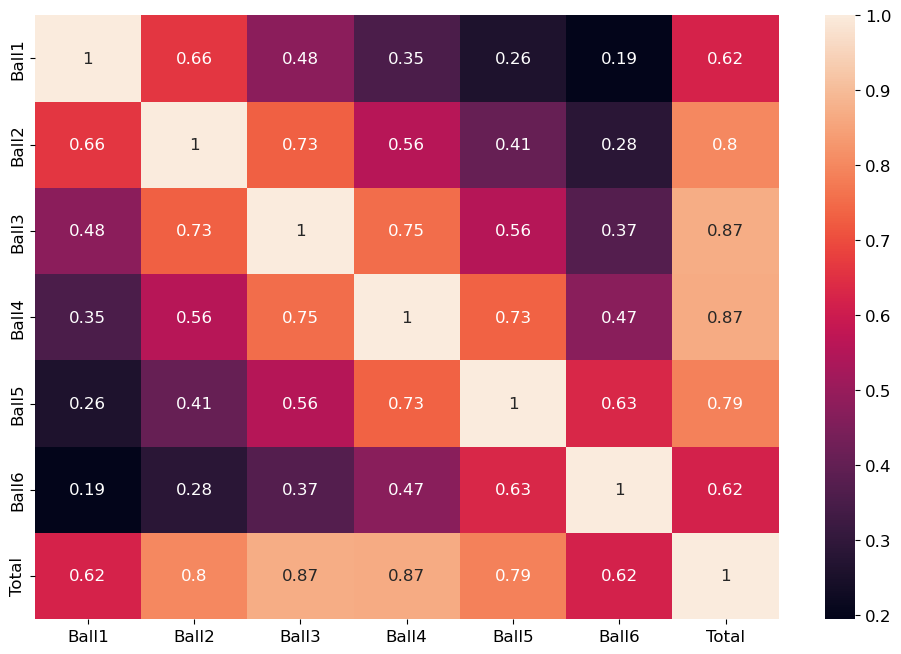

In [107]:
Var_Corr = new_df.corr().abs()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_df[['Ball1','Ball2','Ball3','Ball4','Ball5','Ball6']], new_df.Jackpot_Winner, test_size=0.2, random_state=0)

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [110]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [111]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

ValueError: Classification metrics can't handle a mix of unknown and continuous targets